<a href="https://colab.research.google.com/github/VuMaiTuan/20144483-VuMaiTuan/blob/main/BUOI8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from keras.datasets import mnist
from matplotlib import pyplot
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

(x_train, y_train),(x_test,y_test)= mnist.load_data()

In [17]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
y_train.shape

(60000, 10)

In [21]:
x_test.shape

(10000, 28, 28)

In [22]:
y_test.shape

(10000, 10)

In [23]:
from keras.layers.convolutional.conv1d import Conv
from keras.utils import load_img
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation='relu',input_shape=(28,28,1),padding="same"))
model.add(MaxPooling2D((2,2),padding="same"))

model.add(Conv2D(64,kernel_size = (3,3), activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,kernel_size = (3,3), activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [24]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
history = model.fit(x_train,y_train,batch_size=128,epochs=20,verbose=2)

Epoch 1/20
469/469 - 97s - loss: 0.5697 - accuracy: 0.9258 - 97s/epoch - 206ms/step
Epoch 2/20
469/469 - 97s - loss: 0.0458 - accuracy: 0.9857 - 97s/epoch - 206ms/step
Epoch 3/20
469/469 - 98s - loss: 0.0332 - accuracy: 0.9892 - 98s/epoch - 208ms/step
Epoch 4/20
469/469 - 102s - loss: 0.0239 - accuracy: 0.9924 - 102s/epoch - 219ms/step
Epoch 5/20
469/469 - 98s - loss: 0.0237 - accuracy: 0.9924 - 98s/epoch - 209ms/step
Epoch 6/20
469/469 - 96s - loss: 0.0186 - accuracy: 0.9939 - 96s/epoch - 205ms/step
Epoch 7/20
469/469 - 97s - loss: 0.0217 - accuracy: 0.9928 - 97s/epoch - 207ms/step
Epoch 8/20
469/469 - 95s - loss: 0.0178 - accuracy: 0.9942 - 95s/epoch - 204ms/step
Epoch 9/20
469/469 - 96s - loss: 0.0171 - accuracy: 0.9942 - 96s/epoch - 204ms/step
Epoch 10/20
469/469 - 97s - loss: 0.0135 - accuracy: 0.9951 - 97s/epoch - 206ms/step
Epoch 11/20
469/469 - 95s - loss: 0.0157 - accuracy: 0.9950 - 95s/epoch - 203ms/step
Epoch 12/20
469/469 - 95s - loss: 0.0145 - accuracy: 0.9952 - 95s/epoch 

In [25]:
model.save('buoi8.h5')

In [26]:
test_lost,test_acc=model.evaluate(x_test,y_test)
print('Test accuracy:',test_acc)

313/313 [==============================] - 6s 18ms/step - loss: 0.0532 - accuracy: 0.9888
Test accuracy: 0.9887999892234802


1/1 [==============================] - 0s 18ms/step
This is number: 2


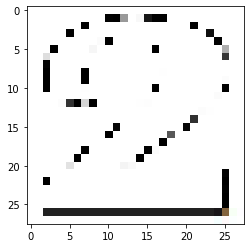

In [31]:
img = load_img('/content/2.jpg',target_size=(28,28))
plt.imshow(img)
img = img_to_array(img)
img = img[:,:,0]
img = img.astype('float32')
img = img.reshape(1,28,28,1)
img = img/255
class_number=['1','2','3','4','5','6','7','8','9','0']
a= int(np.argmax(model.predict(img),axis=1))
print("This is number:", class_number[a])